# The Sparks Foundation
## Stock Market Prediction using Numerical and Textual Analysis
## Sohini Mukherjee (17.04.2021)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('BSESN.txt', index_col='Date', parse_dates=True)

In [3]:
df.shape

(1232, 6)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0
2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0
2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0
2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0
2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-28,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0
2020-10-29,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0
2020-10-30,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0
2020-11-02,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0
2020-11-03,39990.750000,40354.730469,39952.789063,40261.128906,40261.128906,21400.0


In [6]:
df.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [7]:
df.dropna(inplace =True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2015-11-04 to 2020-11-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1228 non-null   float64
 1   High       1228 non-null   float64
 2   Low        1228 non-null   float64
 3   Close      1228 non-null   float64
 4   Adj Close  1228 non-null   float64
 5   Volume     1228 non-null   float64
dtypes: float64(6)
memory usage: 67.2 KB


<AxesSubplot:xlabel='Date'>

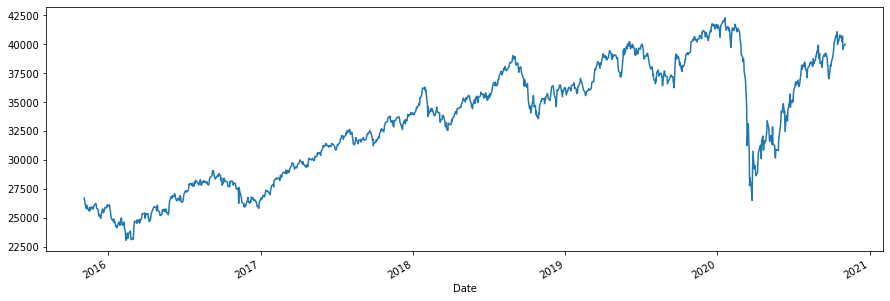

In [9]:
df['Open'].plot(figsize=(15,5))

In [10]:
#7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-05,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-16,26107.594308,26239.212891,25900.281529,26051.092634,26051.092634,12114.285714
2015-11-17,25992.431641,26117.518415,25789.207032,25952.742746,25952.742746,12500.000000
2015-11-18,25889.561663,26022.169643,25676.367188,25835.359933,25835.359933,13042.857143


<AxesSubplot:xlabel='Date'>

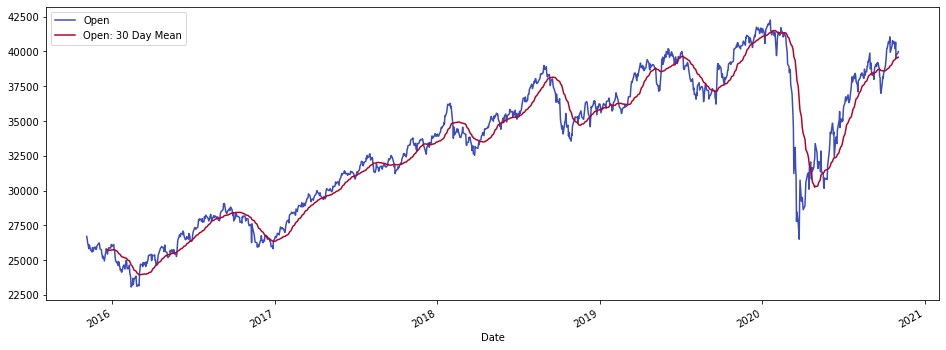

In [11]:
df['Open: 30 Day Mean'] = df['Open'].rolling(window=30).mean()
df[['Open','Open: 30 Day Mean']].plot(figsize=(16,6), colormap='coolwarm')

<AxesSubplot:xlabel='Date'>

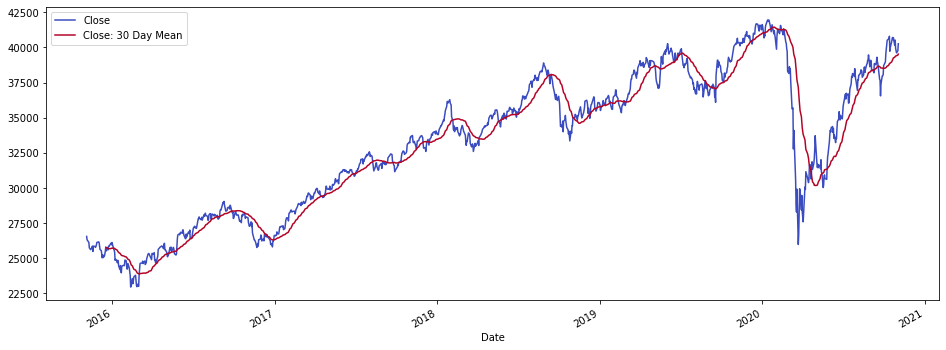

In [12]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6), colormap='coolwarm')

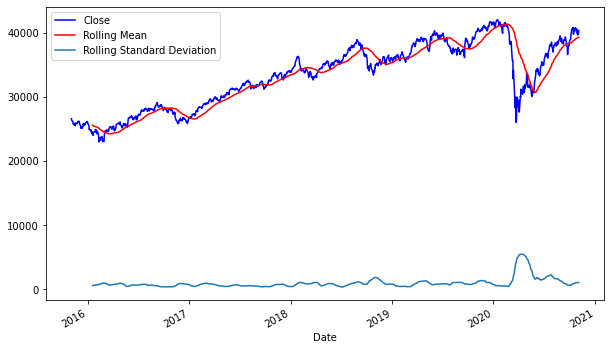

In [13]:
#plotting moving average
close = df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

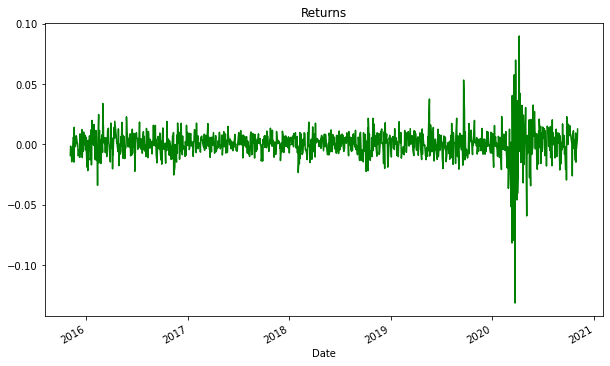

In [14]:
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [15]:
close = df.reset_index()['Close']

In [16]:
close.head()

0    26552.919922
1    26304.199219
2    26265.240234
3    26121.400391
4    25743.259766
Name: Close, dtype: float64

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1,1))

In [18]:
print(close)

[[0.18952308]
 [0.17643306]
 [0.17438268]
 ...
 [0.87692314]
 [0.88447587]
 [0.91097743]]


### Spliting Data

In [19]:
training_size=int(len(close)*0.65)
test_size=len(close)-training_size
train_data,test_data=close[0:training_size,:],close[training_size:len(close),:1]

In [20]:
training_size,test_size

(798, 430)

In [21]:
train_data

array([[0.18952308],
       [0.17643306],
       [0.17438268],
       [0.16681248],
       [0.14691118],
       [0.13992565],
       [0.14779745],
       [0.15329043],
       [0.13318858],
       [0.1521036 ],
       [0.15350198],
       [0.15091522],
       [0.1486206 ],
       [0.15824602],
       [0.16717029],
       [0.16808977],
       [0.1693392 ],
       [0.1666256 ],
       [0.15445609],
       [0.14137718],
       [0.13569321],
       [0.12412636],
       [0.10969121],
       [0.12107334],
       [0.11013219],
       [0.11570669],
       [0.12465841],
       [0.13381222],
       [0.15009628],
       [0.13512014],
       [0.14652386],
       [0.13887944],
       [0.15254468],
       [0.15193471],
       [0.16221954],
       [0.16460626],
       [0.15831962],
       [0.16660926],
       [0.14060038],
       [0.1383368 ],
       [0.12917878],
       [0.0999958 ],
       [0.10433772],
       [0.0985858 ],
       [0.09105929],
       [0.10011575],
       [0.09584548],
       [0.079

### Function to create X_train, y_train AND X_test, y_test

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(df, time_step=1):
    dataX, dataY = [], []
    for i in range(len(df)-time_step-1):
        a = df[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(df[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(697, 100)
(697,)


(None, None)

In [25]:
print(X_test.shape), print(y_test.shape)

(329, 100)
(329,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
print(X_train.shape), print(y_train.shape)

(697, 100, 1)
(697,)


(None, None)

### Creating LSTM Model

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_LSTM=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 16s 585ms/step - loss: 0.0999 - val_loss: 0.0410
Epoch 2/100
11/11 [==============================] - 2s 220ms/step - loss: 0.0116 - val_loss: 0.0129
Epoch 3/100
11/11 [==============================] - 2s 217ms/step - loss: 0.0068 - val_loss: 0.0300
Epoch 4/100
11/11 [==============================] - 3s 236ms/step - loss: 0.0040 - val_loss: 0.0112
Epoch 5/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0021 - val_loss: 0.0110
Epoch 6/100
11/11 [==============================] - 2s 220ms/step - loss: 0.0014 - val_loss: 0.0119
Epoch 7/100
11/11 [==============================] - 2s 212ms/step - loss: 0.0015 - val_loss: 0.0114
Epoch 8/100
11/11 [==============================] - 2s 212ms/step - loss: 0.0014 - val_loss: 0.0107
Epoch 9/100
11/11 [==============================] - 2s 226ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 10/100
11/11 [==============================] - 2s 231ms/step - loss: 0.0013 - val_l

11/11 [==============================] - 3s 278ms/step - loss: 6.1698e-04 - val_loss: 0.0027
Epoch 80/100
11/11 [==============================] - 3s 258ms/step - loss: 6.5412e-04 - val_loss: 0.0029
Epoch 81/100
11/11 [==============================] - 3s 250ms/step - loss: 5.6895e-04 - val_loss: 0.0038
Epoch 82/100
11/11 [==============================] - 3s 249ms/step - loss: 5.6456e-04 - val_loss: 0.0030
Epoch 83/100
11/11 [==============================] - 3s 249ms/step - loss: 5.3639e-04 - val_loss: 0.0030
Epoch 84/100
11/11 [==============================] - 3s 263ms/step - loss: 6.0042e-04 - val_loss: 0.0026
Epoch 85/100
11/11 [==============================] - 3s 273ms/step - loss: 6.3467e-04 - val_loss: 0.0033
Epoch 86/100
11/11 [==============================] - 3s 250ms/step - loss: 5.5190e-04 - val_loss: 0.0027
Epoch 87/100
11/11 [==============================] - 3s 251ms/step - loss: 5.3967e-04 - val_loss: 0.0029
Epoch 88/100
11/11 [==============================] - 3s 24

### Plotting loss

In [32]:
def plot_learningCurve(history,epochs):
    
    ## Plot training and validation loss value
    epoch_range= range(1,epochs+1)
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['Train', 'val'],loc='upper left')
    plt.show()

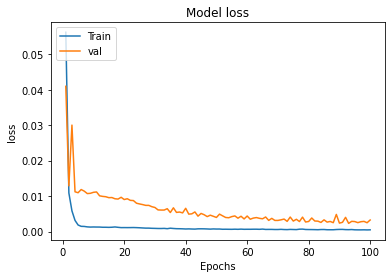

In [33]:
plot_learningCurve(history_LSTM,100)

### Prediction

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

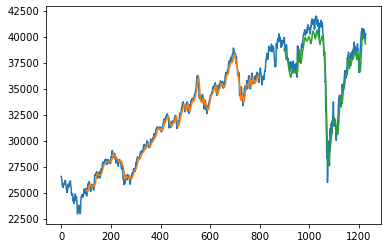

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Model Definition with Conv1D

In [37]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten

In [38]:
# define model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

In [39]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                156850    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 157,093
Trainable params: 157,093
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_CNN=model_cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 54ms/step - loss: 0.1274 - val_loss: 0.0559
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0155 - val_loss: 0.0832
Epoch 3/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0076 - val_loss: 0.0346
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0033 - val_loss: 0.0329
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0026 - val_loss: 0.0289
Epoch 6/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0027 - val_loss: 0.0268
Epoch 7/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 0.0247
Epoch 8/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0020 - val_loss: 0.0212
Epoch 9/100
11/11 [==============================] - 0s 21ms/step - loss: 0.0019 - val_loss: 0.0195
Epoch 10/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0018 - val_loss: 0.0169

Epoch 80/100
11/11 [==============================] - 0s 15ms/step - loss: 4.9626e-04 - val_loss: 0.0074
Epoch 81/100
11/11 [==============================] - 0s 15ms/step - loss: 4.9190e-04 - val_loss: 0.0075
Epoch 82/100
11/11 [==============================] - 0s 15ms/step - loss: 6.2359e-04 - val_loss: 0.0079
Epoch 83/100
11/11 [==============================] - 0s 15ms/step - loss: 6.0813e-04 - val_loss: 0.0080
Epoch 84/100
11/11 [==============================] - 0s 15ms/step - loss: 5.1617e-04 - val_loss: 0.0074
Epoch 85/100
11/11 [==============================] - 0s 15ms/step - loss: 4.9836e-04 - val_loss: 0.0073
Epoch 86/100
11/11 [==============================] - 0s 15ms/step - loss: 4.6236e-04 - val_loss: 0.0072
Epoch 87/100
11/11 [==============================] - 0s 19ms/step - loss: 4.3609e-04 - val_loss: 0.0072
Epoch 88/100
11/11 [==============================] - 0s 17ms/step - loss: 5.0591e-04 - val_loss: 0.0071
Epoch 89/100
11/11 [==============================] - 0

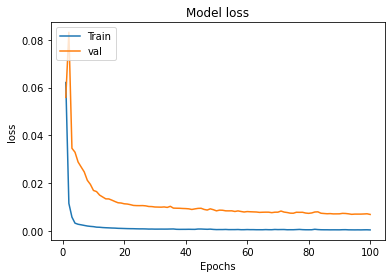

In [41]:
plot_learningCurve(history_CNN,100)

# Prediction

In [42]:
train_predict_cnn=model_cnn.predict(X_train)
test_predict_cnn=model_cnn.predict(X_test)

In [43]:
##Transformback to original form
train_predict_cnn=scaler.inverse_transform(train_predict_cnn)
test_predict_cnn=scaler.inverse_transform(test_predict_cnn)

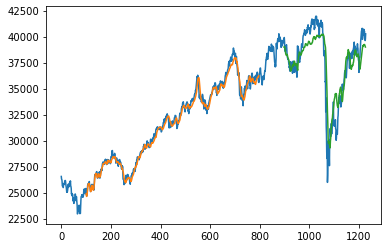

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_cnn)+look_back, :] = train_predict_cnn
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_cnn)+(look_back*2)+1:len(close)-1, :] = test_predict_cnn
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Model Definition with Conv1D and LSTM

In [45]:
# define model
model_mix = Sequential()
model_mix.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model_mix.add(MaxPooling1D(pool_size=2))
model_mix.add(LSTM(32,return_sequences=True))
model_mix.add(LSTM(32))
model_mix.add(Dense(6, activation='relu'))
model_mix.add(Dense(1))
model_mix.compile(optimizer='adam', loss='mse')

In [46]:
model_mix.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 49, 32)            12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 21,133
Trainable params: 21,133
Non-trainable params: 0
__________________________________________________

In [47]:
history_mix=model_mix.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 11s 273ms/step - loss: 0.1119 - val_loss: 0.0180
Epoch 2/100
11/11 [==============================] - 1s 79ms/step - loss: 0.0099 - val_loss: 0.0386
Epoch 3/100
11/11 [==============================] - 1s 78ms/step - loss: 0.0063 - val_loss: 0.0160
Epoch 4/100
11/11 [==============================] - 1s 80ms/step - loss: 0.0033 - val_loss: 0.0174
Epoch 5/100
11/11 [==============================] - 1s 88ms/step - loss: 0.0020 - val_loss: 0.0154
Epoch 6/100
11/11 [==============================] - 1s 86ms/step - loss: 0.0018 - val_loss: 0.0153
Epoch 7/100
11/11 [==============================] - 1s 88ms/step - loss: 0.0018 - val_loss: 0.0150
Epoch 8/100
11/11 [==============================] - 1s 89ms/step - loss: 0.0017 - val_loss: 0.0150
Epoch 9/100
11/11 [==============================] - 1s 87ms/step - loss: 0.0016 - val_loss: 0.0147
Epoch 10/100
11/11 [==============================] - 1s 86ms/step - loss: 0.0019 - val_loss: 0.01

Epoch 81/100
11/11 [==============================] - 1s 75ms/step - loss: 8.4410e-04 - val_loss: 0.0090
Epoch 82/100
11/11 [==============================] - 1s 74ms/step - loss: 9.4905e-04 - val_loss: 0.0059
Epoch 83/100
11/11 [==============================] - 1s 75ms/step - loss: 6.6466e-04 - val_loss: 0.0056
Epoch 84/100
11/11 [==============================] - 1s 68ms/step - loss: 7.3525e-04 - val_loss: 0.0077
Epoch 85/100
11/11 [==============================] - 1s 65ms/step - loss: 8.8637e-04 - val_loss: 0.0063
Epoch 86/100
11/11 [==============================] - 1s 68ms/step - loss: 6.4555e-04 - val_loss: 0.0056
Epoch 87/100
11/11 [==============================] - 1s 66ms/step - loss: 7.2976e-04 - val_loss: 0.0062
Epoch 88/100
11/11 [==============================] - 1s 65ms/step - loss: 6.5466e-04 - val_loss: 0.0062
Epoch 89/100
11/11 [==============================] - 1s 65ms/step - loss: 6.4025e-04 - val_loss: 0.0056
Epoch 90/100
11/11 [==============================] - 1

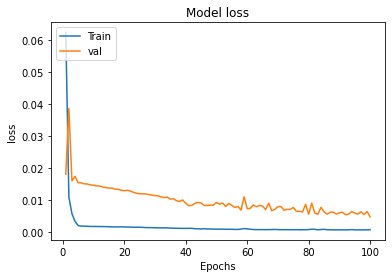

In [48]:
plot_learningCurve(history_mix,100)

# Prediction

In [49]:
train_predict_mix=model_mix.predict(X_train)
test_predict_mix=model_mix.predict(X_test)

In [50]:
##Transformback to original form
train_predict_mix=scaler.inverse_transform(train_predict_mix)
test_predict_mix=scaler.inverse_transform(test_predict_mix)

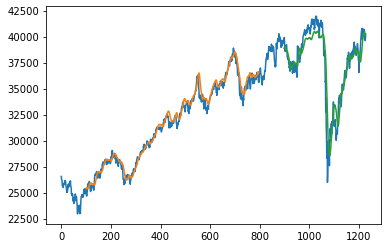

In [51]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_mix)+look_back, :] = train_predict_mix
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_mix)+(look_back*2)+1:len(close)-1, :] = test_predict_mix
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Textual Analysis

In [52]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
cols = ['Date','Category','News']
df_news = pd.read_csv('E:/GRIP/india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [54]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [55]:
df_news.head()

,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic


In [56]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,2020-12-31,Govt extends deadline for use of FASTag till F...


In [57]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news.head(10)

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
5,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
6,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
7,2001-01-09,Financier Bharat Shah held for alleged links w...
8,2001-01-10,Fend for yourselves; Pande tells doctors Burea...
9,2001-01-23,Sonia takes on the Hindutva brigade Congress h...


In [58]:
df_news.shape

(7262, 2)

In [59]:
df_news.tail()

,Date,News
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...
7261,2020-12-31,Horoscope Today; 31 December 2020: Check astro...


In [60]:
#Cleaning headlines
ps= PorterStemmer()
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [61]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pull stephen hawk india vajpaye give bi...
3,2001-01-05,light combat craft take india club class hawk ...
4,2001-01-06,light combat craft take india club class hawk ...
...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...
7258,2020-12-28,horoscop today decemb check astrolog predict a...
7259,2020-12-29,man recov char remain thief burnt shop dump be...
7260,2020-12-30,numerolog read decemb predict lucki colour luc...


In [62]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [63]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394
...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116


In [64]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187,-0.9998,0.145,0.786,0.068
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069


In [66]:
df_merge = pd.merge(df, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,Open: 30 Day Mean,Close: 30 Day Mean,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0,NaN,NaN,rule date non vegetarian top diabet diet tip i...,0.407544,0.081833,-0.9996,0.129,0.780,0.091
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0,NaN,NaN,easi gajar ka halwa recip five festiv hair ide...,0.373590,0.115210,-0.9983,0.117,0.783,0.099
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0,NaN,NaN,way make life romant brilliant way prevent obe...,0.423474,0.078966,-0.9981,0.125,0.767,0.109
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0,NaN,NaN,perfum safe health think love secretari women ...,0.529966,0.305813,-0.9920,0.120,0.767,0.113
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0,NaN,NaN,top workout mistak book review enigma china fi...,0.466888,0.183373,0.9799,0.108,0.781,0.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2020-10-28,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0,39495.326693,39386.313542,like sexless marriag gujarat candi man smitten...,0.412921,0.062479,-0.9999,0.148,0.791,0.060
1224,2020-10-29,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0,39507.865365,39401.213542,leopard kill kid ahmednagar dist cop injur nas...,0.388910,0.049966,-0.9999,0.144,0.787,0.069
1225,2020-10-30,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0,39529.838021,39422.354167,covid new case death bihar uproar amc meet str...,0.374593,0.070519,-0.9998,0.139,0.781,0.079
1226,2020-11-02,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0,39552.503255,39452.746094,horoscop today novemb check astrolog predict a...,0.367484,0.079752,-0.9998,0.152,0.769,0.079


In [67]:
df1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df1

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,26552.919922,0.407544,0.081833,-0.9996,0.129,0.780,0.091
1,26304.199219,0.373590,0.115210,-0.9983,0.117,0.783,0.099
2,26265.240234,0.423474,0.078966,-0.9981,0.125,0.767,0.109
3,26121.400391,0.529966,0.305813,-0.9920,0.120,0.767,0.113
4,25743.259766,0.466888,0.183373,0.9799,0.108,0.781,0.111
...,...,...,...,...,...,...,...
1223,39922.460938,0.412921,0.062479,-0.9999,0.148,0.791,0.060
1224,39749.851563,0.388910,0.049966,-0.9999,0.144,0.787,0.069
1225,39614.070313,0.374593,0.070519,-0.9998,0.139,0.781,0.079
1226,39757.578125,0.367484,0.079752,-0.9998,0.152,0.769,0.079


In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df1))
new_df.columns = df1.columns
new_df.index = df1.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.189523,0.409091,0.298177,0.000201,0.417476,0.432203,0.543210
1,0.176433,0.258316,0.402763,0.000853,0.300971,0.457627,0.641975
2,0.174383,0.479833,0.289194,0.000953,0.378641,0.322034,0.765432
3,0.166812,0.952720,1.000000,0.004013,0.330097,0.322034,0.814815
4,0.146911,0.672613,0.616345,0.993277,0.213592,0.440678,0.790123


In [69]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [70]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.409091,0.298177,0.000201,0.417476,0.432203,0.543210
1,0.258316,0.402763,0.000853,0.300971,0.457627,0.641975
2,0.479833,0.289194,0.000953,0.378641,0.322034,0.765432
3,0.952720,1.000000,0.004013,0.330097,0.322034,0.814815
4,0.672613,0.616345,0.993277,0.213592,0.440678,0.790123


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(982, 6)

In [72]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
359,0.327919,0.339325,0.000151,0.398058,0.508475,0.456790
303,0.542220,0.399135,0.000100,0.485437,0.398305,0.518519
1192,0.280049,0.262191,0.000050,0.699029,0.389831,0.246914
1040,0.333221,0.445468,0.003863,0.300971,0.398305,0.753086
58,0.281561,0.179747,0.000050,0.679612,0.305085,0.382716
610,0.399193,0.317661,0.000050,0.514563,0.415254,0.444444
943,0.281566,0.291204,0.001555,0.291262,0.440678,0.691358
1075,0.272320,0.329133,0.007124,0.106796,0.694915,0.543210
870,0.884091,0.668824,0.000201,0.359223,0.584746,0.395062
457,0.257089,0.242736,0.000100,0.533981,0.347458,0.506173


**RANDOM FOREST REGESSOR**

In [73]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [74]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.20428649 0.54166774 0.31956009 0.55856149 0.72411501 0.42592686
 0.5402458  0.3915099  0.51859012 0.45782738]
18      0.154456
546     0.676086
268     0.187540
1221    0.904892
874     0.871028
757     0.699401
1076    0.368139
52      0.078093
472     0.466422
503     0.554004
Name: Close, dtype: float64
0.04671719635223817


**DECISION TREEE REGRESSOR**

In [75]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [76]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.15009628 0.70943553 0.14652386 0.43736216 0.72489541 0.14779745
 0.4407915  0.40099054 0.58853046 0.36742771]
18      0.154456
546     0.676086
268     0.187540
1221    0.904892
874     0.871028
757     0.699401
1076    0.368139
52      0.078093
472     0.466422
503     0.554004
Name: Close, dtype: float64
0.09063989297881662


**XG BOOST REGRESSOR**

In [77]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.05742087657720023
